In [1]:
import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
import numpy as np
import time

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('AMD')


randomImage = np.random.random((1024,1960))

def selectMatrix(matrixNum=1, scale=0.5) :
    if (matrixNum == 1):
        return np.asarray([
            [scale , 0, 0],
            [0, scale, 0],
            [0, 0, 1]
        ])
    elif (matrixNum == 2):
        return np.asarray([
            [0.70710677 , 0.70710677, 0],
            [-0.70710677, 0.70710677, 0],
            [0, 0, 1]
        ])
    elif (matrixNum == 3):
        s=0.5
        matrix = np.asarray([
            [scale , 0, 0, 0],
            [0, scale, 0, 0],
            [0, 0, scale, 0],
            [0, 0, 0, 1]
        ])

cl.OCLArray([[1., 1., 1., 1., 1., 4., 4., 4., 4., 4.],
       [1., 1., 1., 1., 1., 4., 4., 4., 4., 4.],
       [1., 1., 1., 1., 1., 4., 4., 4., 4., 4.],
       [1., 1., 1., 1., 1., 4., 4., 4., 4., 4.],
       [1., 1., 1., 1., 1., 4., 4., 4., 4., 4.],
       [2., 2., 2., 2., 2., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 2., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 2., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 2., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 2., 3., 3., 3., 3., 3.]], dtype=float32)
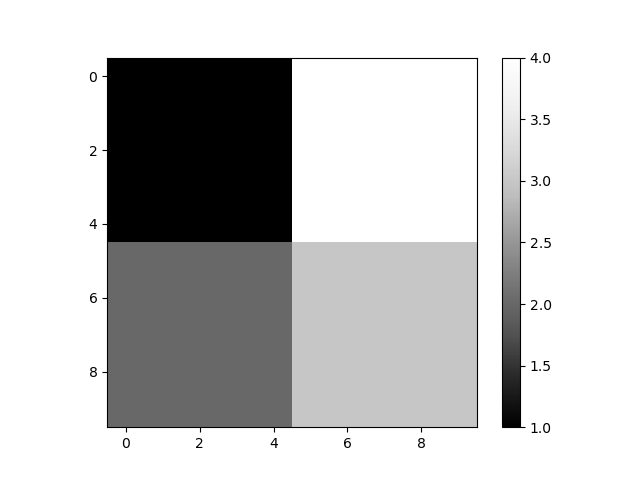
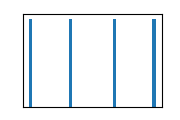

In [5]:
# Create image
image = np.zeros((10, 10))
image[:5,:5]=1
image[5:,:5]=2
image[5:,5:]=3
image[:5,5:]=4
image = cle.asarray(image)
image

Executing affine_transform_2d_x.cl


cl.OCLArray([[1.       , 1.       , 1.       , 1.       , 1.       , 1.4242641,
        2.3477669, 2.4949749, 3.       , 3.       ],
       [0.       , 1.       , 1.       , 1.       , 1.4242641, 1.4949747,
        2.       , 2.424264 , 2.4949749, 3.       ],
       [0.       , 0.       , 0.       , 1.4242641, 1.4949747, 2.       ,
        2.       , 2.       , 2.424264 , 2.4949749],
       [0.       , 0.       , 0.       , 0.       , 2.       , 2.       ,
        2.       , 2.       , 2.       , 2.424264 ],
       [0.       , 0.       , 0.       , 0.       , 2.       , 2.       ,
        2.       , 2.       , 2.       , 2.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 2.       ,
        2.       , 2.       , 2.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        2.       , 2.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ]], dtype=float32)
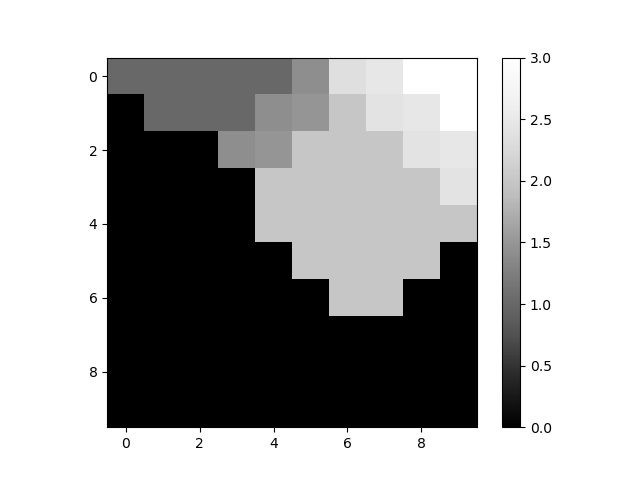
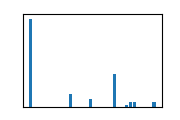

In [10]:
matrix = selectMatrix(2)
result1 = cle.affine_transform(image, transform=matrix)
result1

Executing affine_transform_2d_interpolate_x.cl


cl.OCLArray([[0.5      , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.4492188, 2.4492188, 3.       , 3.       ],
       [0.       , 0.5      , 1.       , 1.       , 1.       , 1.4492188,
        2.       , 2.       , 2.4492188, 3.       ],
       [0.       , 0.       , 0.5      , 1.       , 1.4492188, 2.       ,
        2.       , 2.       , 2.       , 2.4492188],
       [0.       , 0.       , 0.       , 0.7246094, 2.       , 2.       ,
        2.       , 2.       , 2.       , 2.       ],
       [0.       , 0.       , 0.       , 0.       , 1.       , 2.       ,
        2.       , 2.       , 2.       , 1.203125 ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 1.       ,
        2.       , 2.       , 1.203125 , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        1.       , 1.203125 , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ]], dtype=float32)
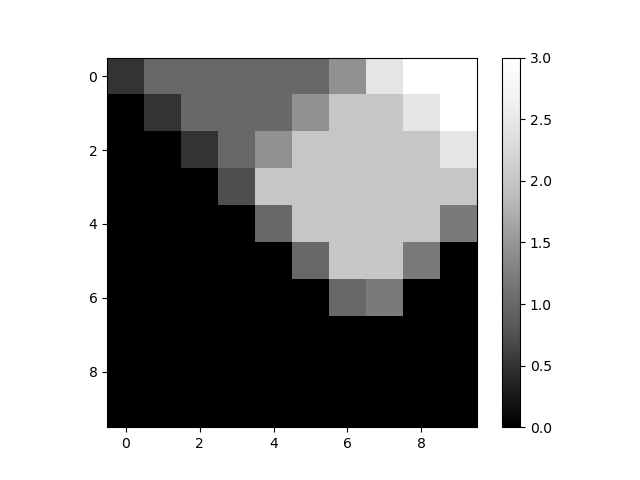
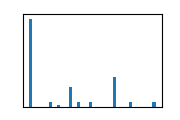

In [12]:
matrix = selectMatrix(2)
result2 = cle.affine_transform(image, transform=matrix, linear_interpolation=True)
result2

cl.OCLArray([[ 0.5       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.42426407,  0.8985481 ,  0.0457561 ,  0.        ,  0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        ,  0.42426407,
         0.04575598,  0.        ,  0.42426395,  0.0457561 ,  0.        ],
       [ 0.        ,  0.        , -0.5       ,  0.42426407,  0.04575598,
         0.        ,  0.        ,  0.        ,  0.42426395,  0.0457561 ],
       [ 0.        ,  0.        ,  0.        , -0.7246094 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.42426395],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.796875  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.796875  ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.796875  ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)
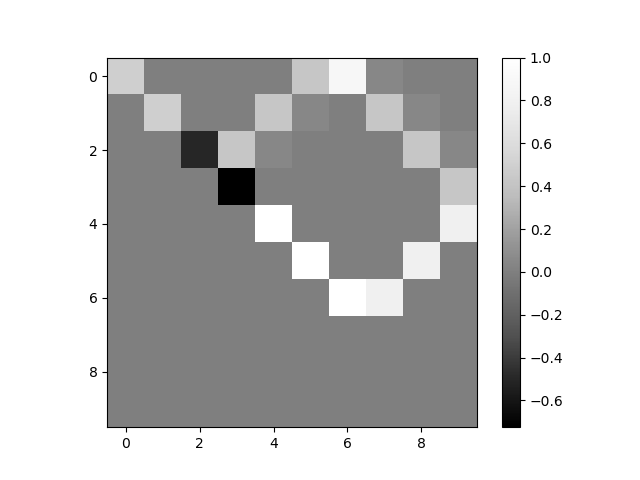
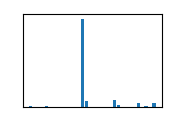

In [13]:
result1-result2

In [14]:
cle.mean_squared_error(result1, result2)

0.08077944755554199